# Train/test classifier

In [36]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve
from sklearn import metrics

# Hide deprecated warnings
import warnings
warnings.filterwarnings('ignore')

In [37]:
#https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f

## Load the data

In [38]:
fv = pd.read_csv("/Users/AirMorena/Desktop/final_proj/csv/google_play_store/160619final_feature_vector.csv")

In [39]:
fv.shape

(9351, 74)

In [40]:
fv.head()

,Installs_group,st_Rating,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,...,month_11,month_12,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Android Ver_levels_high,Android Ver_levels_low
0,0,-0.179640,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,-0.569116,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1,0.988789,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0.599313,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0.209837,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [41]:
#Hyperparameters:
#1)max_depth. This indicates how deep the tree can be. The deeper the tree, the more splits 
#it has and it captures more information about the data. We fit a decision tree
#with depths ranging from 1 to 32 and plot the training and test auc scores.

#2)min_samples_split
#min_samples_split represents the minimum number of samples required to split an internal node. 
#This can vary between considering at least one sample at each node to considering all of the samples at each node. 
#When we increase this parameter, the tree becomes more constrained as it has to consider more samples at each node. 
#Here we will vary the parameter from 10% to 100% of the samples

#3)min_samples_leaf: is The minimum number of samples required to be at a leaf node
#This parameter is similar to min_samples_splits, however, 
#this describe the minimum number of samples of samples at the leafs, the base of the tree.

#4)max_features:
#max_features represents the number of features to consider when looking for the best split.
#5) random state to 42 which means the results will be the same each time I run the split for reproducible results.

In [42]:
fv.head()

,Installs_group,st_Rating,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,...,month_11,month_12,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Android Ver_levels_high,Android Ver_levels_low
0,0,-0.179640,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,-0.569116,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1,0.988789,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0.599313,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0.209837,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


## Train/Test Split

In [43]:
X = fv.drop(['Installs_group'], axis=1)
y = fv['Installs_group']
# we keep 33% of data for test dataset: cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [44]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

## Decision Tree - Visualization

In [45]:
# Initialize the model
tree_viz = DecisionTreeClassifier(max_depth=4)
#(class_weight=None, criterion=’gini’, max_depth=3,
 #max_features=None, max_leaf_nodes=None,
 #min_impurity_split=1e-07, min_samples_leaf=1,
 #min_samples_split=2, min_weight_fraction_leaf=0.0,
# presort=False, random_state=None, splitter=’best’)

# Train with a reduced number of columns to see how does it work
#tree_viz.fit(X_train.iloc[:,:10], y_train)
tree_viz.fit(X_train, y_train) #           
             

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

X1: st_Rating
X2: Category_ART_AND_DESIGN
X3: Category_AUTO_AND_VEHICLES
X4: Category_BEAUTY
X5: Category_BOOKS_AND_REFERENCE



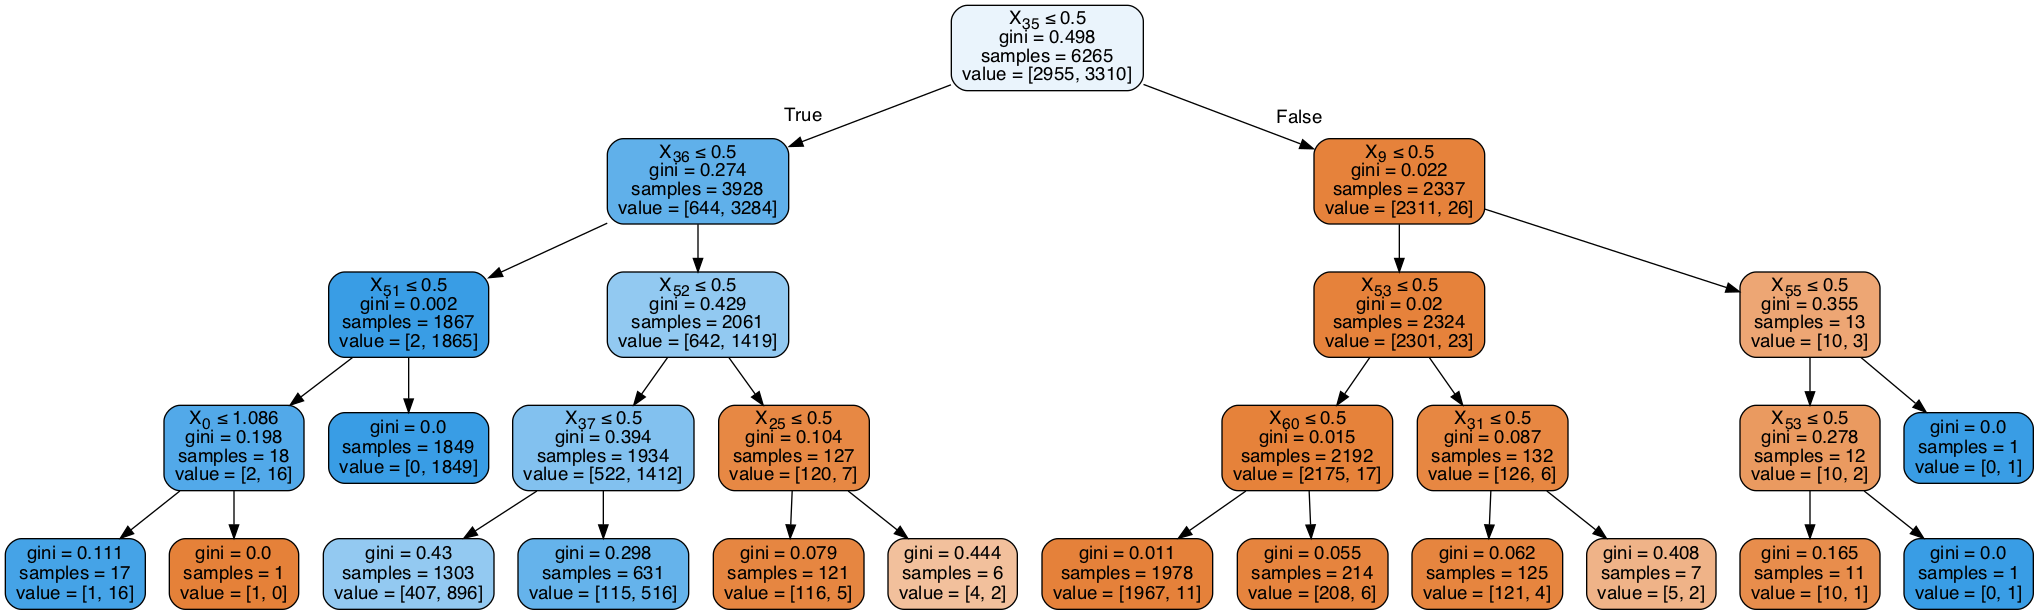

In [65]:
# Show Xs names
X_names = X_train.iloc[:,:5].columns.tolist()
print("X1: {}\nX2: {}\nX3: {}\nX4: {}\nX5: {}\n".format(X_names[0], X_names[1], X_names[2], X_names[3],
                                                       X_names[4]))

dot_data = StringIO()
export_graphviz(tree_viz, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

![gini](giniindex.png)

## Decision Tree - Grid Search & Cross Validation

See the list of scoring functions [here](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)

![decision_tree](decision_tree_hyper.png)

In [47]:
# Initialize the model
tree = DecisionTreeClassifier()

# Define the values of the hyperparameters to optimize
max_depth = [5, 10]#[10, 50, 100, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
max_leaf_nodes = [2, 5, 10]
max_features = [10, 15, 20]#['sqrt', 'log2']
hyperparameters = dict(max_depth=max_depth, min_samples_split=min_samples_split,
                      min_samples_leaf=min_samples_leaf, max_leaf_nodes=max_leaf_nodes)

# Initialize GridSearch/Cross-validation
clf = GridSearchCV(tree, hyperparameters, cv=5, scoring='accuracy')

# Run the optimization
best_model = clf.fit(X_train, y_train)

In [48]:
# Results
best_model.cv_results_

{'mean_fit_time': array([0.01476851, 0.011656  , 0.00981278, 0.01079216, 0.00976076,
        0.01041508, 0.01009741, 0.01124496, 0.01044436, 0.01245522,
        0.01305304, 0.01242924, 0.01172605, 0.01551976, 0.01202464,
        0.01192384, 0.011622  , 0.01255918, 0.01285582, 0.01234269,
        0.01281118, 0.01460986, 0.01348276, 0.01319938, 0.01233907,
        0.01242738, 0.01314335, 0.00955215, 0.00986838, 0.00987873,
        0.01149683, 0.00958042, 0.0104671 , 0.00955944, 0.00957875,
        0.00982809, 0.0119493 , 0.01455202, 0.01238346, 0.01191597,
        0.01433849, 0.01237292, 0.01321416, 0.01227951, 0.01188831,
        0.01476903, 0.0128891 , 0.01458306, 0.01291075, 0.01370091,
        0.0142673 , 0.01476607, 0.01412482, 0.01589413]),
 'std_fit_time': array([2.88069410e-03, 1.97755704e-03, 7.94805301e-05, 1.41331019e-03,
        8.69005599e-05, 1.55798933e-03, 8.42555331e-04, 8.80114677e-04,
        5.94544835e-04, 1.35441086e-03, 6.41689698e-04, 1.15537827e-03,
        1.748

In [49]:
# Set of hyperparameters from the model that perform the best on average from all cross validations
best_model.best_params_

{'max_depth': 5,
 'max_leaf_nodes': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [50]:
# Average value for the metric for the model evaluation in the best set of hyperparameters
best_model.best_score_

0.9110933758978452

#### Visualize the results of hyperparameter optimization grid search

In [51]:
params = best_model.cv_results_['params']
train_scores = best_model.cv_results_['mean_train_score']
test_scores = best_model.cv_results_['mean_test_score']
times = best_model.cv_results_['mean_fit_time']

GS_performance = pd.DataFrame({'max_depth': [i['max_depth'] for i in params],
                                 'max_leaf_nodes': [i['max_leaf_nodes'] for i in params],
                               'min_samples_leaf': [i['min_samples_leaf'] for i in params],
                               'min_samples_split': [i['min_samples_split'] for i in params],
                                 'train_score': train_scores,
                                 'test_score': test_scores,
                                 'fit_time': times})

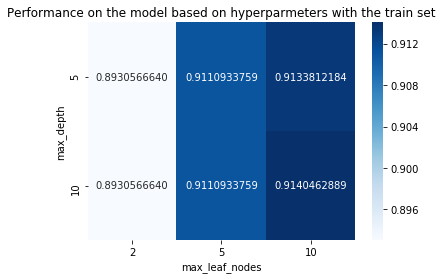

In [52]:
_=sns.heatmap(GS_performance[['max_depth','max_leaf_nodes','train_score']].pivot_table(values='train_score', 
                                  index='max_depth', columns='max_leaf_nodes'), annot=True, fmt='.10f', cmap='Blues')
_=plt.title("Performance on the model based on hyperparmeters with the train set")

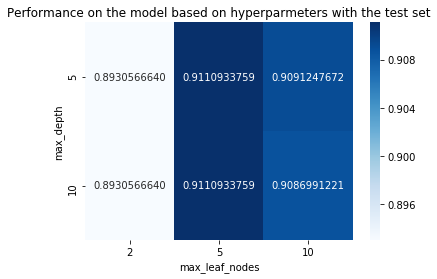

In [53]:
_=sns.heatmap(GS_performance[['max_depth','max_leaf_nodes','test_score']].pivot_table(values='test_score', 
                               index='max_depth', columns='max_leaf_nodes'), annot=True, fmt='.10f', cmap='Blues')
_=plt.title("Performance on the model based on hyperparmeters with the test set")

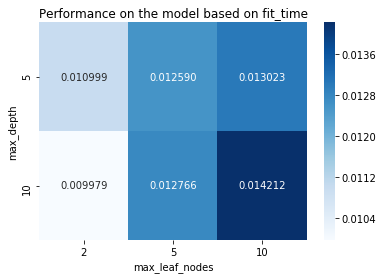

In [54]:
_=sns.heatmap(GS_performance[['max_depth','max_leaf_nodes','fit_time']].pivot_table(values='fit_time', 
                           index='max_depth', columns='max_leaf_nodes'), annot=True, fmt='.6f', cmap='Blues')
_=plt.title("Performance on the model based on fit_time")

In [55]:
y_pred = best_model.predict(X_test)

## Decision Tree - Best Model Evaluation

![precision_recall](prec_recall.png "Title")

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      1451
           1       0.85      0.99      0.91      1635

   micro avg       0.90      0.90      0.90      3086
   macro avg       0.92      0.90      0.90      3086
weighted avg       0.91      0.90      0.90      3086



In [57]:
# Compute confusion matrix to evaluate the accuracy of a classification

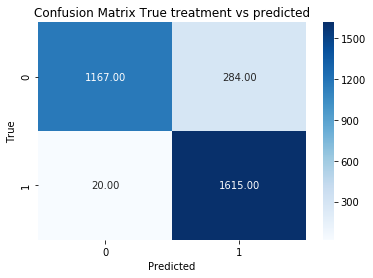

In [58]:
# Normalized (by the number of interviewed people in each class) confusion matrix
cm = confusion_matrix(y_test, y_pred)
#cm = cm.astype('float') / cm.sum(axis=1)

_=sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f')
_=plt.xlabel('Predicted')
_=plt.ylabel('True')
_=plt.title("Confusion Matrix True treatment vs predicted")

### What is the best probability threshold to decide if, based on the given situation, the person is taking mental treatment?

In [59]:
# Predict the probabilities of being taking treatment
y_pred_test = best_model.predict_proba(X_test)

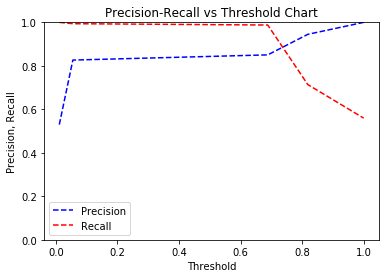

In [60]:
# Visualize how the precision and the recall changes when moving the threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_test[:, 1]) 
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
_=plt.ylim([0,1])

### What is the area under the curve according to the optimal threshold?

![ROC_curve](ROC_curves.png "Title")

In [61]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_test[:, 1])

AUC: 0.958


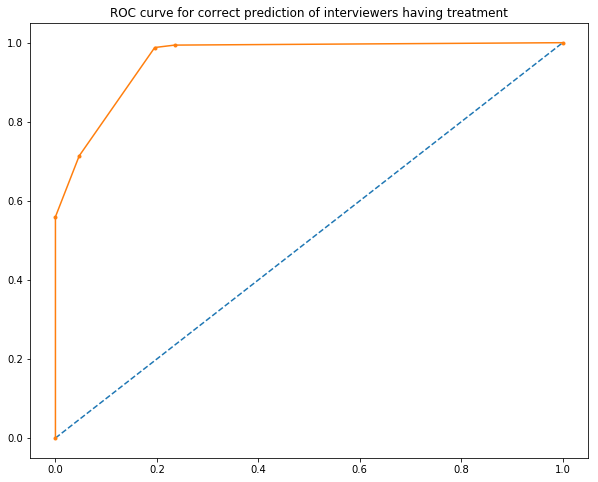

In [62]:
auc = roc_auc_score(y_test, y_pred_test[:, 1])
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test[:, 1])

# plot random case
_=plt.figure(figsize=(10, 8))
_=plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
_=plt.plot(fpr, tpr, marker='.')
_=plt.title("ROC curve for correct prediction of interviewers having treatment")